# oasis intership

Task - 3
## name - ashwini deshpande

# EMAIL SPAM DETECTION WITH MACHINE LEARNING
We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.
In this Project, use Python to build an email spam detector. Then, use machine learning to train the spam detector to recognize and classify emails into spam and non-spam. Let’s get started!

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.rename(columns = {'v1':'label', 'v2':'message'}, inplace = True)

In [4]:
df = df[['label','message']].copy()

In [5]:
df.shape

(5572, 2)

In [6]:
df.size

11144

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
#Renaming the Columns
df.rename({'v1':'Type','v2':'SMS'},axis=1,inplace=True)
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
## Checking Missing Values
df.isnull().sum()

label      0
message    0
dtype: int64

In [12]:
##Check for Duplicated Values
df.duplicated().sum()

403

In [13]:
##Remove Duplicates
df = df.drop_duplicates(keep='first')
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.duplicated().sum()

0

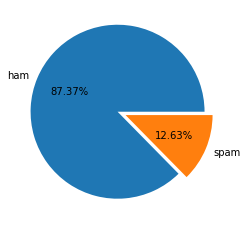

In [15]:
plt.pie(df['label'].value_counts(),labels=['ham','spam'],autopct='%0.2f%%',explode=[0.1,0])
plt.show()

In [16]:
# data is imbalaced
## Now we are going to do Analysis on No. of Characters, Words, and Sentences Used in every Message

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [22]:
## Number of Characters
df['num_characters'] = df['message'].apply(len) 
df.head()

C:\Users\Ashwi\AppData\Local\Temp/ipykernel_16740/1897591849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['message'].apply(len)


,label,message,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
## Number of Words
df['num_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\Ashwi/nltk_data'
    - 'C:\\Users\\Ashwi\\anaconda3\\nltk_data'
    - 'C:\\Users\\Ashwi\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\Ashwi\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Ashwi\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [19]:
df['num_sentences'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\Ashwi/nltk_data'
    - 'C:\\Users\\Ashwi\\anaconda3\\nltk_data'
    - 'C:\\Users\\Ashwi\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\Ashwi\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Ashwi\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


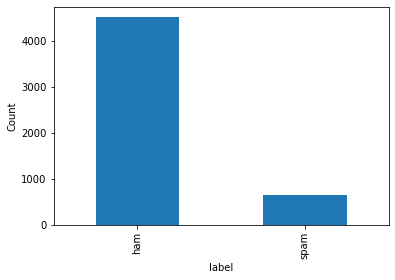

In [24]:
#Plotting Spam(1) vs Not Spam(0) value counts
df['label'].value_counts().plot(kind='bar')
plt.xlabel('label')
plt.ylabel('Count')
plt.show()

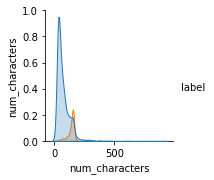

In [25]:
import seaborn as sns
sns.pairplot(df,hue='label')
plt.show()

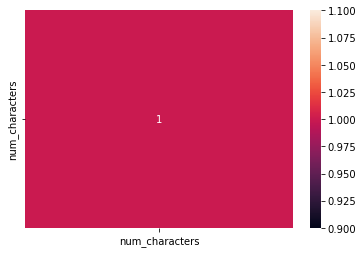

In [26]:
sns.heatmap(df.corr(),annot=True)
plt.show()

<AxesSubplot:xlabel='label', ylabel='num_characters'>

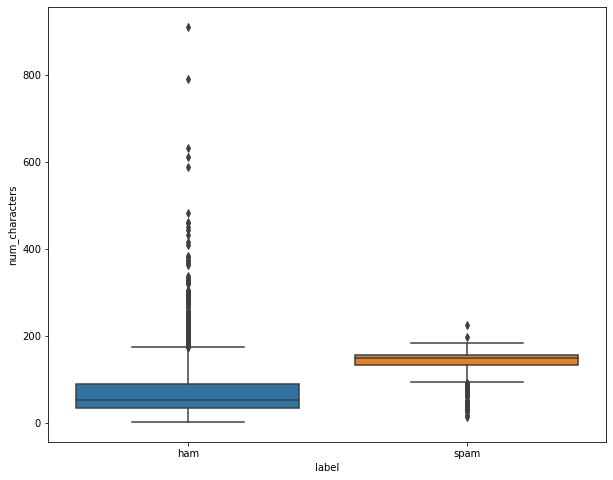

In [27]:
plt.figure(figsize=(10,8))
sns.boxplot(x='label',y='num_characters',data=df)

In [28]:
# let's do data preprocessing like remove punctucation, stopwords, stemming.
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer

ps = PorterStemmer()

def text_processing(text):
    text = nltk.word_tokenize(text.lower())
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            stemming = ps.stem(i)
            y.append(stemming)
            
    return " ".join(y)

In [29]:
text_processing('I Loved the YT Lectures on machine Learning What About You! dacing dance danced')

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\Ashwi/nltk_data'
    - 'C:\\Users\\Ashwi\\anaconda3\\nltk_data'
    - 'C:\\Users\\Ashwi\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\Ashwi\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Ashwi\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [30]:
## First of all We have to Convert Our SMS text to Vectors Using Bag of Words Technique

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tf = TfidfVectorizer(max_features=3000)

In [31]:
# first convert label col to numeric 
df['label'] = df.label.map({'ham':0 , 'spam':1})
df.head(1)

C:\Users\Ashwi\AppData\Local\Temp/ipykernel_16740/466438285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df.label.map({'ham':0 , 'spam':1})


,label,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111


In [32]:
# split the data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.33, random_state=42)
print('Size of training data{}',format(X_train.shape[0]))
print('Size of Testing data{}',format(X_test.shape[0]))

Size of training data{} 3463
Size of Testing data{} 1706


In [33]:
# Convert Sms To BOW Count verctor
count_vector = CountVectorizer()
train_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

In [34]:
# BOW(Bag Of Word) Look Like This 
# convert text to numbers for ML 
count_vector = CountVectorizer()
col_name = count_vector.fit(df['message']).get_feature_names()
data = count_vector.transform(list(df['message'])).toarray()
BOW = pd.DataFrame(data, columns= col_name)
BOW.head()

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,ó_,û_,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(train_data , y_train)


MultinomialNB()

In [36]:
predection = naive_bayes.predict(testing_data)

In [37]:
from sklearn.metrics import accuracy_score ,f1_score , precision_score , recall_score

print('Accuracy score: {}'.format(accuracy_score(y_test, predection)))
print('precision_score: {}'.format(precision_score(y_test, predection)))
print('recall_score: {}'.format(recall_score(y_test, predection)))
print('f1_score: {}'.format(f1_score(y_test, predection)))

Accuracy score: 0.984759671746776
precision_score: 0.9727272727272728
recall_score: 0.9145299145299145
f1_score: 0.9427312775330396


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string if there are nans
#dataset['description'] = dataset['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix_train = tfidf.fit_transform(X_train)
tfidf_matrix_valid= tfidf.transform(X_train)

tfidf_matrix_train.shape

(3463, 6628)

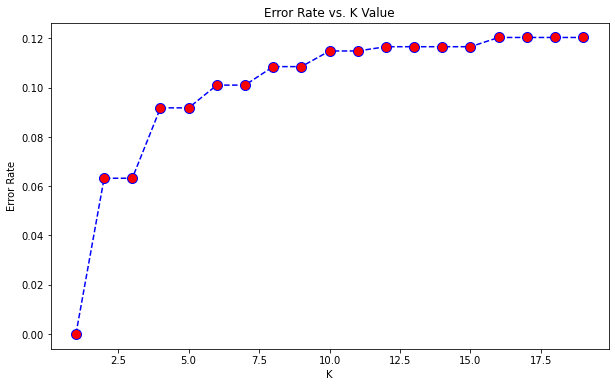

In [39]:
#Visualization to find the best K value
from sklearn.neighbors import KNeighborsClassifier
#To find the optimal k value: K=((Sqrt(N)/2)
#Visualisation for the Error Rate/K-value 
error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p=1)
    knn.fit(tfidf_matrix_train, y_train)
    pred_i_knn = knn.predict(tfidf_matrix_train)
    error_rate.append(np.mean(pred_i_knn != y_train))
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [40]:
#Funtion to build and visualise a confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title, accuracy_title):
    cm=confusion_matrix(y_test, y_pred)
    print(f'{accuracy_title} Accuracy Score:', '{:.2%}'.format(accuracy_score(y_train, y_pred)))
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='magma')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

In [41]:
X_train.isnull().any()

False

KNN Accuracy Score: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3044
           1       1.00      1.00      1.00       419

    accuracy                           1.00      3463
   macro avg       1.00      1.00      1.00      3463
weighted avg       1.00      1.00      1.00      3463



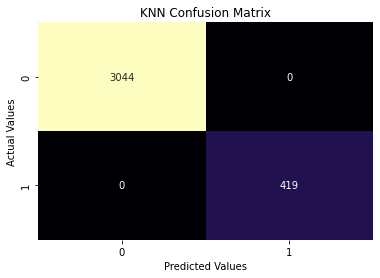

In [42]:
#Fitting the KMM model
knn_classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p=1)
knn_classifier.fit(tfidf_matrix_train, y_train)
y_pred_knn=knn_classifier.predict(tfidf_matrix_valid)
cm_knn=my_confusion_matrix(y_train, y_pred_knn, 'KNN Confusion Matrix', 'KNN')

Logistic Regression: Accuracy Score: 95.90%
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3044
           1       0.99      0.67      0.80       419

    accuracy                           0.96      3463
   macro avg       0.97      0.83      0.89      3463
weighted avg       0.96      0.96      0.96      3463



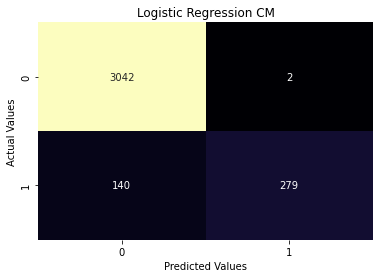

array([[3042,    2],
       [ 140,  279]], dtype=int64)

In [43]:
#Training the model
from sklearn.linear_model import LogisticRegression
log_reg_classifier=LogisticRegression(solver='liblinear')
log_reg_classifier.fit(tfidf_matrix_train, y_train)
y_pred_log=log_reg_classifier.predict(tfidf_matrix_valid)
my_confusion_matrix(y_train, y_pred_log, 'Logistic Regression CM', 'Logistic Regression:')

Random Forest Accuracy Score: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3044
           1       1.00      1.00      1.00       419

    accuracy                           1.00      3463
   macro avg       1.00      1.00      1.00      3463
weighted avg       1.00      1.00      1.00      3463



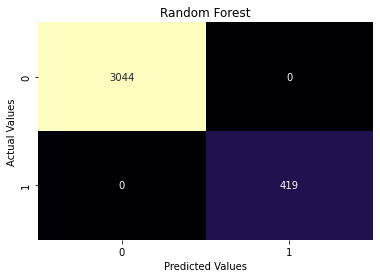

[[3044    0]
 [   0  419]]


In [44]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(tfidf_matrix_train, y_train)
y_pred_rfc=rfc.predict(tfidf_matrix_valid)
print(my_confusion_matrix(y_train, y_pred_rfc, 'Random Forest', 'Random Forest'))

SVC Accuracy Score: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3044
           1       1.00      1.00      1.00       419

    accuracy                           1.00      3463
   macro avg       1.00      1.00      1.00      3463
weighted avg       1.00      1.00      1.00      3463



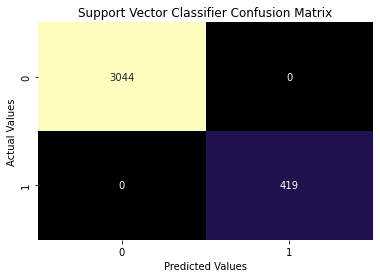

In [45]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', C=10)
svc.fit(tfidf_matrix_train, y_train)
y_pred_svc= svc.predict(tfidf_matrix_valid)
cm_svc=my_confusion_matrix(y_train, y_pred_svc, 'Support Vector Classifier Confusion Matrix', 'SVC')

Thank You